In [63]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # for derivative
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __sub__(self,other):
        out = Value(self.data - other.data, (self,other), '-')
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')
        return out

In [65]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build (v):
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}"% (n.label, n.data, n.grad, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

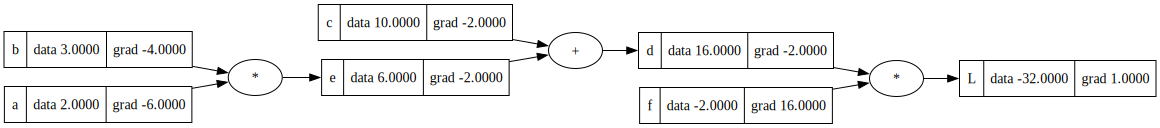

In [70]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = c + e; d.label = 'd'

f = Value(-2.0, label='f')
L = d*f; L.label='L'

### gradients

#dL/dL = 1
L.grad = 1

#dL/df = d(df)/df= d
#dL/dd = f
f.grad = d.data
d.grad = f.data


d = c + e
# dL/dc = dL/dd *dd/dc = -2 * 1 = -2
c.grad = -2
e.grad = -2

# dL/db = dL/dd * dd/de * de/db = -2 * a
b.grad = e.grad * a.data
a.grad = e.grad * b.data
draw_dot(L)

In [73]:
def lol():

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = c + e; d.label = 'd'

    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(3.0, label='b')
    b.data += h
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = c + e; d.label = 'd'

    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol()

-3.999999999997783
